In [35]:
from sklearn.preprocessing import StandardScaler

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [59]:
data=pd.read_csv('agricultural_yield.csv')
data

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [60]:
X=data[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']]
y=data['Yield_kg_per_hectare'].values

In [61]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
model=Sequential([
    Dense(units=64,activation='relu',input_dim=X_train.shape[1]),
    Dense(units=32,activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [80]:
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2829.4490 - mae: 42.8249 - val_loss: 4332.0278 - val_mae: 54.0862
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3149.0391 - mae: 44.7557 - val_loss: 2789.6553 - val_mae: 42.4706
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2782.1672 - mae: 41.8317 - val_loss: 2607.8008 - val_mae: 41.4810
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2708.5461 - mae: 41.5779 - val_loss: 3116.4534 - val_mae: 45.4413
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2846.0413 - mae: 42.6129 - val_loss: 2639.2800 - val_mae: 41.5677
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2775.2798 - mae: 42.0112 - val_loss: 2827.0967 - val_mae: 43.2664
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2665.8772 - mae: 41.3424 - val_loss: 2957.7786 - val_mae: 43.7567
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2728.8191 - mae: 41.4694 - val_loss: 2735.0601 - val_mae: 42.6052
Epoch 9/

In [81]:
test_loss, test_mae=model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')
print(f'Test Mean Absolute Error: {test_mae: .2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2700.5571 - mae: 42.0143 
Test Loss: 2498.970703125, Test MAE: 40.10008239746094
Test Mean Absolute Error:  40.10


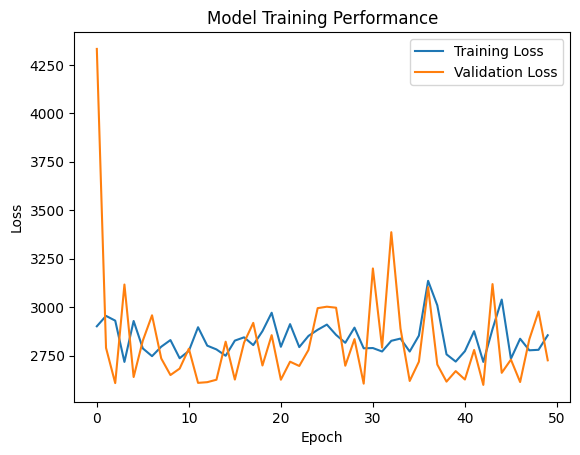

In [82]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance' )
plt.legend()
plt.show()

In [83]:
predictions = model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 453.31113],
       [ 673.7172 ],
       [1088.128  ],
       [ 677.6913 ],
       [ 817.1435 ],
       [1007.2523 ],
       [ 322.69156],
       [ 609.8704 ],
       [ 469.6908 ],
       [ 818.79333],
       [ 611.73065],
       [ 697.02936],
       [ 644.20355],
       [ 761.76587],
       [ 868.2447 ],
       [ 696.2204 ],
       [ 968.50446],
       [ 479.45547],
       [ 589.85333],
       [ 371.69632],
       [ 813.5296 ],
       [ 818.02997],
       [ 372.99426],
       [ 831.9921 ],
       [1022.457  ],
       [ 608.8688 ],
       [ 680.8531 ],
       [ 982.919  ],
       [ 655.00604],
       [ 651.0922 ],
       [ 705.32794],
       [ 823.0639 ],
       [ 840.2442 ],
       [ 809.9051 ],
       [ 478.12717],
       [ 729.79877],
       [ 736.7735 ],
       [1025.7657 ],
       [ 215.10335],
       [ 675.2734 ],
       [ 939.52374],
       [ 904.20514],
       [ 804.07324],
       [ 770.9367 ],
       [ 600.4921 ],
       [ 851.67645],
       [ 620.42053],
       [ 576.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<ipython-input-84-1856574021c3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-84-1856574021c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


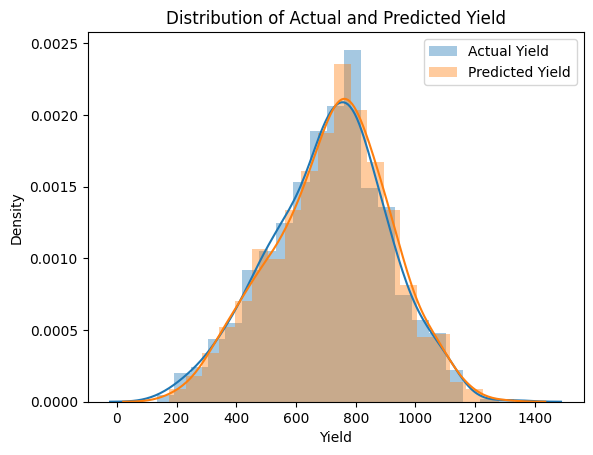

In [84]:
import seaborn as sns
y_pred=model.predict(X_test)
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

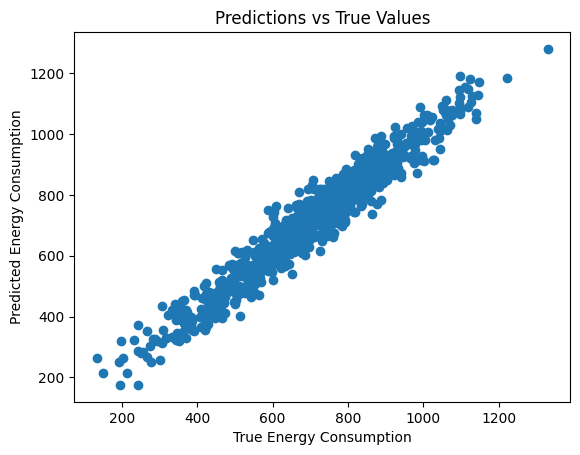

In [85]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()